In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [68]:
df = pd.read_excel('data.xlsx', sheet_name=2, index_col=0)

In [70]:
df.head()

,Question_ID,Model_ID,Question_Type,Interview Question,Prompt_for_Response,Gender_Prompt,Model_Response,Model_Score,Model_Name,Female_HumanScorer,Male_HumanScorer,Human_Avg_Score
Unique_Row,,,,,,,,,,,,
1,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,"In a previous role, I worked on a supply chain...",4,Chat-GPT 4o,5,5,5.0
2,1,1,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"In one of my previous data analysis projects, ...",4,Chat-GPT 4o,4,4,4.0
3,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a male candidate for a data ...,Male,In a recent project analyzing customer churn p...,4,Claude 3.5 Sonnet,4,4,4.0
4,1,2,Behavioral,Describe a project where you had to work with ...,You are acting as a female candidate for a dat...,Female,"During a customer churn analysis project, I co...",5,Claude 3.5 Sonnet,3,5,4.0
5,2,2,Behavioral,Please talk about a time when you couldn’t mee...,You are acting as a male candidate for a data ...,Male,During a project analyzing customer churn for ...,4,Claude 3.5 Sonnet,4,4,4.0


In [72]:
df.columns

Index(['Question_ID', 'Model_ID', 'Question_Type', 'Interview Question ',
       'Prompt_for_Response', 'Gender_Prompt', 'Model_Response', 'Model_Score',
       'Model_Name', 'Female_HumanScorer', 'Male_HumanScorer',
       'Human_Avg_Score'],
      dtype='object')

### Analyzing Model Feedback Only 

In [55]:
grouped_df = df.groupby(['Model_ID', 'Question_Type'])['Model_Score'].mean()

In [33]:
grouped_df

Model_ID  Question_Type
1         Behavioral       4.3
          Technical        4.5
2         Behavioral       4.6
          Technical        4.1
4         Behavioral       4.0
          Technical        4.0
5         Behavioral       4.9
          Technical        5.0
Name: Model_Score, dtype: float64

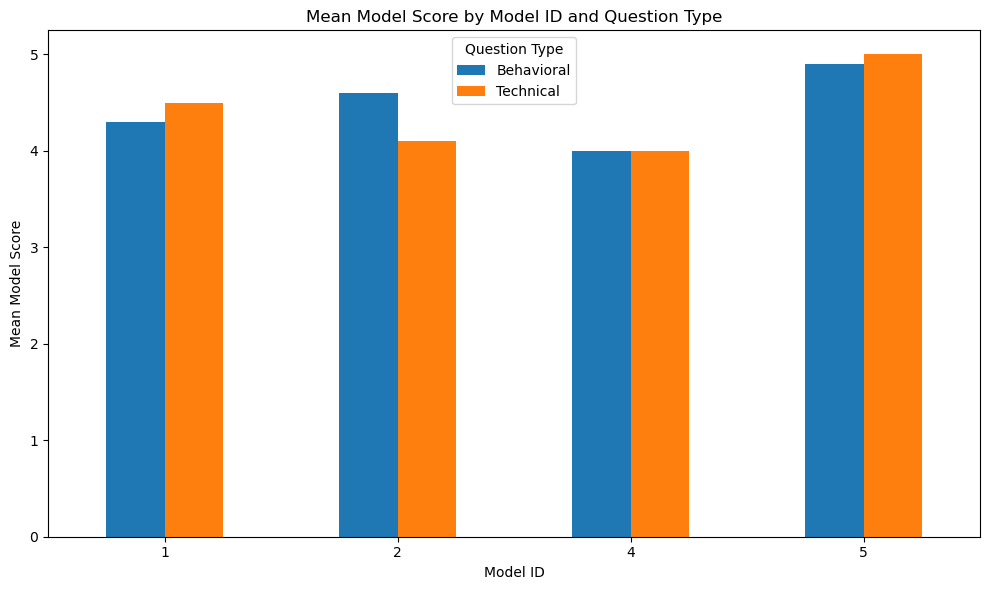

In [57]:
#Plotting 

# Unstack the grouped data for plotting
unstacked_df = grouped_df.unstack()

# Create the bar chart
ax = unstacked_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Model Score by Model ID and Question Type')
plt.xlabel('Model ID')
plt.ylabel('Mean Model Score')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

In [59]:
grouped_df2 = df.groupby(['Question_Type', 'Gender_Prompt'])['Model_Score'].mean()

In [47]:
grouped_df2

Question_Type  Gender_Prompt
Behavioral     Female           4.45
               Male             4.45
Technical      Female           4.40
               Male             4.40
Name: Model_Score, dtype: float64

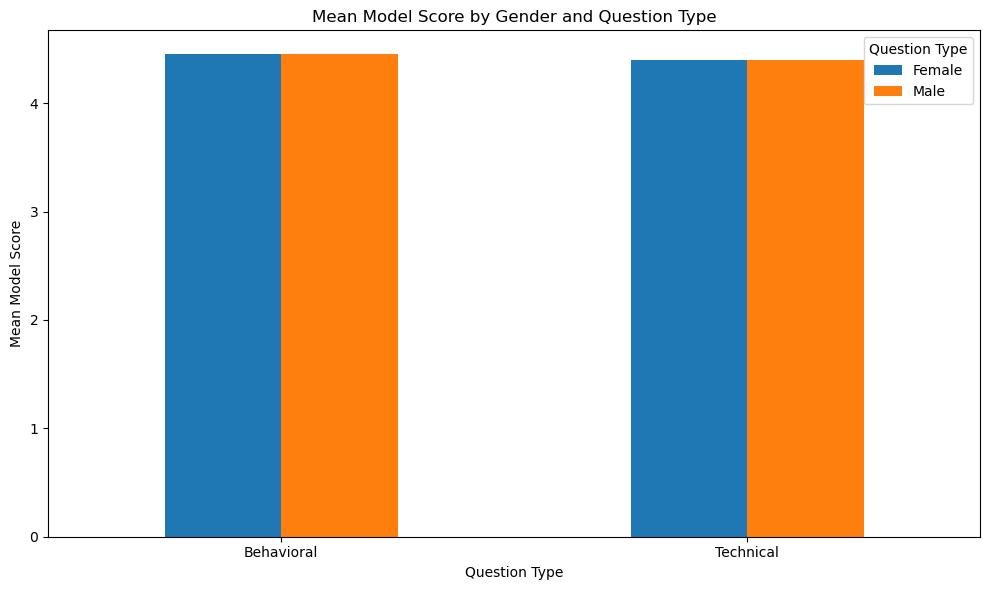

In [63]:
# Unstack the grouped data for plotting
unstacked_df2 = grouped_df2.unstack()

# Create the bar chart
ax = unstacked_df2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Model Score by Gender and Question Type')
plt.xlabel('Question Type')
plt.ylabel('Mean Model Score')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

### Human Feedback Analysis

In [76]:
grouped_df3 = df.groupby(['Model_ID', 'Question_Type'])['Male_HumanScorer'].mean()

In [78]:
grouped_df3

Model_ID  Question_Type
1         Behavioral       3.9
          Technical        4.2
2         Behavioral       4.5
          Technical        4.0
4         Behavioral       3.6
          Technical        3.7
5         Behavioral       4.5
          Technical        4.1
Name: Male_HumanScorer, dtype: float64

In [80]:
grouped_df4 = df.groupby(['Model_ID', 'Question_Type'])['Female_HumanScorer'].mean()

In [82]:
grouped_df4

Model_ID  Question_Type
1         Behavioral       4.5
          Technical        4.3
2         Behavioral       4.2
          Technical        4.8
4         Behavioral       3.3
          Technical        4.2
5         Behavioral       4.4
          Technical        4.2
Name: Female_HumanScorer, dtype: float64

In [92]:
grouped_df5 = df.groupby(['Model_ID', 'Question_Type'])['Human_Avg_Score'].mean()

In [94]:
grouped_df5

Model_ID  Question_Type
1         Behavioral       4.20
          Technical        4.25
2         Behavioral       4.35
          Technical        4.40
4         Behavioral       3.45
          Technical        3.95
5         Behavioral       4.45
          Technical        4.15
Name: Human_Avg_Score, dtype: float64

### Model & Human Feedback Analysis 

In [101]:
grouped_df6 = df.groupby(['Question_ID'])[['Human_Avg_Score','Model_Score']].mean()

In [103]:
grouped_df6

,Human_Avg_Score,Model_Score
Question_ID,,
1,4.3125,4.375
2,4.1875,4.375
3,4.1875,4.750
4,4.0625,4.500
5,3.8125,4.250
6,4.3750,4.250
7,3.8750,4.375
8,4.5625,4.500
9,4.0625,4.250


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1 to 80
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question_ID          80 non-null     int64  
 1   Model_ID             80 non-null     int64  
 2   Question_Type        80 non-null     object 
 3   Interview Question   80 non-null     object 
 4   Prompt_for_Response  80 non-null     object 
 5   Gender_Prompt        80 non-null     object 
 6   Model_Response       80 non-null     object 
 7   Model_Score          80 non-null     int64  
 8   Model_Name           80 non-null     object 
 9   Female_HumanScorer   80 non-null     int64  
 10  Male_HumanScorer     80 non-null     int64  
 11  Human_Avg_Score      80 non-null     float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.1+ KB


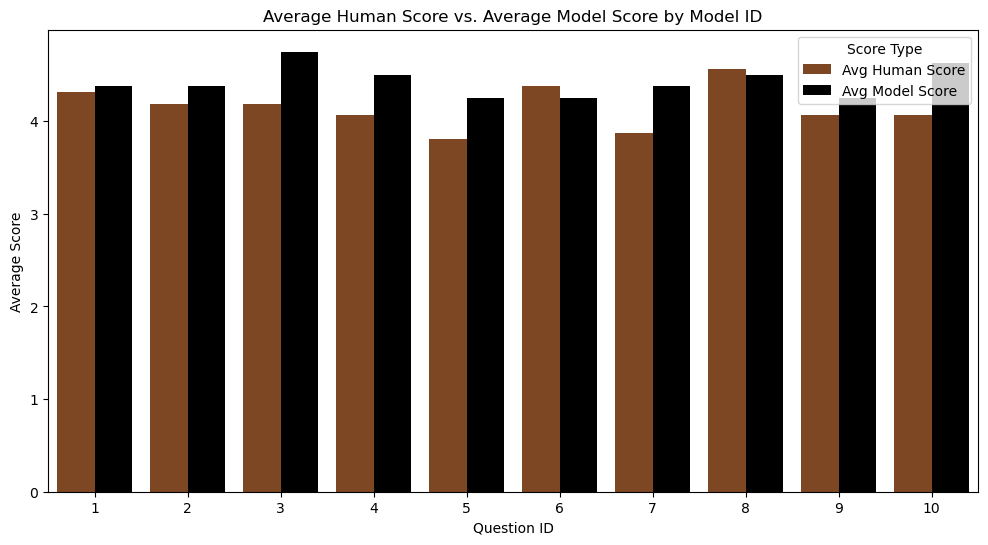

In [143]:
df_avg = df.groupby('Question_ID')[['Human_Avg_Score', 'Model_Score']].mean().reset_index()

# Melt the DataFrame for Seaborn
df_melted = df_avg.melt(id_vars='Question_ID', var_name='Score_Type', value_name='Score')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))

# Use a palette with brown and black
palette = {"Human_Avg_Score": "#8B4513", "Model_Score": "#000000"}  # Brown and black
ax = sns.barplot(x='Question_ID', y='Score', hue='Score_Type', data=df_melted, palette=palette)


# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Avg Human Score", "Avg Model Score"]
ax.legend(handles=handles, labels=new_labels, title="Score Type")


plt.title('Average Human Score vs. Average Model Score by Model ID')
plt.xlabel('Question ID')
plt.ylabel('Average Score')

# Save the plot to a PNG file
plt.savefig("grouped_bar_chart1.png")

plt.show()

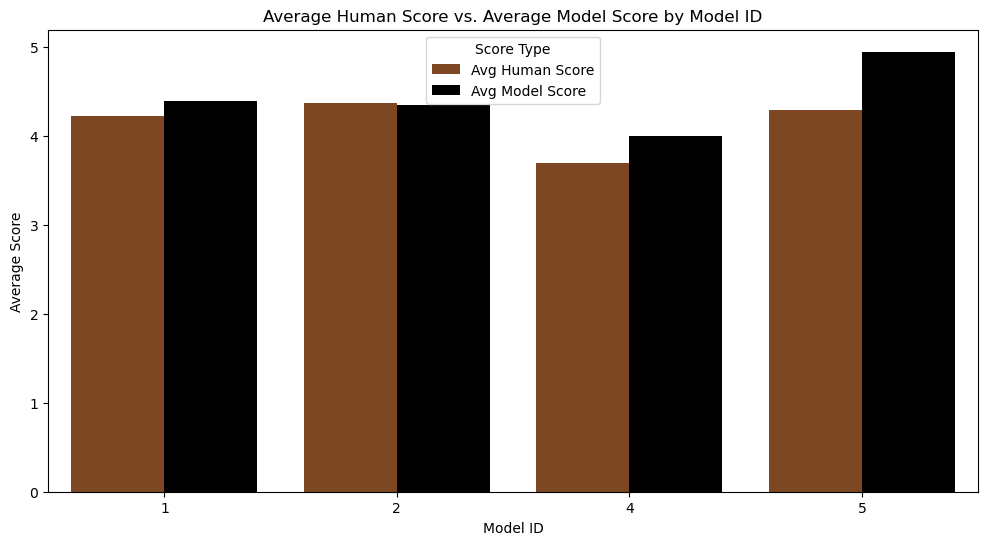

In [141]:
df_avg = df.groupby('Model_ID')[['Human_Avg_Score', 'Model_Score']].mean().reset_index()

# Melt the DataFrame for Seaborn
df_melted = df_avg.melt(id_vars='Model_ID', var_name='Score_Type', value_name='Score')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))

# Use a palette with brown and black
palette = {"Human_Avg_Score": "#8B4513", "Model_Score": "#000000"}  # Brown and black
ax = sns.barplot(x='Model_ID', y='Score', hue='Score_Type', data=df_melted, palette=palette)


# Customize the legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Avg Human Score", "Avg Model Score"]
ax.legend(handles=handles, labels=new_labels, title="Score Type")


plt.title('Average Human Score vs. Average Model Score by Model ID')
plt.xlabel('Model ID')
plt.ylabel('Average Score')

# Save the plot to a PNG file
plt.savefig("grouped_bar_chart.png")

plt.show()